In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [214]:
def gen_num_plot(col_name):
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.boxplot(df[col_name],ax=ax[0])
    sns.histplot(df[col_name],ax=ax[1],kde=True)
    tit1='Boxplot :'+ col_name
    ax[0].set_title(tit1)
    tit2='Histogram :'+ col_name
    ax[1].set_title(tit2)
    tit3='Distributions : ' +col_name
    plt.suptitle(tit3)
    plt.tight_layout()
    plt.show()
    
    

    
def gen_ctgy_plot(col_name):
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    
    colors = sns.color_palette('Set2')
    df[col_name] =df[col_name].fillna('Missing')
    # colors = ['olive', 'teal']
    df[col_name].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', startangle=90,ax=ax[0],colors=colors)
    sns.countplot(data=df,x=col_name,palette=colors,ax=ax[1],order =df[col_name].value_counts().index)
    plt.suptitle(col_name)
    plt.show()

- Name	Description
- order_day	The date when the customer was offered EcoShare in the retention call center
- accept	Whether the customer bought EcoShare during the call
- tos_flg	Whether the customer transferred their service with Reliant Energy from one home to another prior to the call
- disconotice_flg	Whether the customer recently received a disconnect notice from Reliant for not paying their electricity bill
- oam_activelogin_cnt	The number of times the customer logged into Reliant's website within the past month
- term_length	The length of the electricity contract they purchased from Reliant
- called_numcalls_cnt	The number of times the customer called Reliant's call center within the past month
- latefee_flg	Whether the customer was charged a late fee for not paying their Reliant electricity bill on time within the past month
- dwelling_type_cd	Whether the customer lives in a single family home (S) or multi-family home (M)
- curr_usage	The amount of electricity consumed at the customer's home during the previous billing cycle
- product_type_cd	Whether the customer is enrolled on an electricity contract (TERM) or not (MTM)
- pool	Whether the customer's home has a swimming pool
- automatic_payment_flg	Whether the customer is enrolled on Automatic Payment
- weblog_flg	Whether the customer visited Reliant's website within the past month
- risk_level	Whether the customer is at risk of not paying their electricity bill, grouped into low risk (L), medium risk (M), and high risk (H)
- deposit_onhand_amt	The deposit amount the customer paid when they first enrolled with Reliant Energy for electricity service
- ebill_enroll_flag	Whether the customer receives their electricity bills electronically
- called_flg	Whether the customer called Reliant within the past month
- oam_flg	Whether the customer has an online account on Reliant's website
- sap_productname	The name of the electricity plan the customer is enrolled on
- numweblog_cnt	The number of pageviews the customer experienced on Reliant's website within the past month
- disconnects_flg	Whether the customer's electricity service was disconnected within the past month
- load_profile	A code that represents the shape of the customer's electricity consumption pattern.  R1 means the customer has gas heating, R2 means the customer has electric heating, and other load profile values are rare.
- city	The city associated with the customer's service address.
- zipcode	The zipcode associated with the customer's service address.
- home_value	The estimated value of the customer's home.
- county	The county associated with the customer's service address.
- tdsp	The utility that serves the customer's home.
- dma	The marketing area associated with the customer's service address.
- ev_driver	Whether the customer is estimated to drive an electric vehicle.
- segment	NRG's custom, propriety segmentation of its customers.  Each segment value represents a unique type of consumer in the Texas market.
- customer_id	A randomly generated number that represents the account holder who was offered EcoShare on the call.
- meter_id	A randomly generated number that represents the meter(s) of an account holder who was offered EcoShare on the call.

In [215]:
df=pd.read_csv('data_rev3.csv')
df.shape

/var/folders/0h/k469m22d4nlb8wt5k446w_z40000gn/T/ipykernel_31656/2391098834.py:1: DtypeWarning: Columns (5,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data_rev3.csv')


(81315, 33)

In [216]:
df.head()

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id
0,1/1/2017,0,NaN,N,0,0,0,N,M,188.0,MTM,NaN,N,N,M,NaN,Y,N,Y,Reliant Flex plan,0,N,R2,DALLAS,752405170,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,55843,11745
1,1/1/2017,0,NaN,N,0,19,0,N,M,167.0,TERM,NaN,N,N,H,NaN,N,N,N,Reliant Easy Look 19 plan,0,N,R1,HOUSTON,770649432,NaN,HARRIS,CNP,HOUSTON,N,5,17325,25319
2,1/1/2017,0,NaN,N,0,48,0,N,M,188.0,TERM,NaN,N,N,NaN,NaN,N,N,N,Reliant Easy Look 48 plan,0,N,R1,HOUSTON,77007,NaN,HARRIS,CNP,HOUSTON,N,11,20004,23202
3,2/1/2017,0,NaN,N,0,9,1,N,M,135.0,TERM,NaN,N,N,NaN,NaN,Y,Y,Y,Reliant Secure 9 plan,0,N,R2,HOUSTON,770822427,NaN,HARRIS,CNP,HOUSTON,N,11,55635,11475
4,2/1/2017,1,NaN,N,0,12,0,N,S,617.0,TERM,NaN,N,N,L,NaN,N,N,Y,Reliant Secure 12 plan,0,N,R1,DALLAS,752086271,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,49599,38365


In [217]:
df.order_day=pd.to_datetime(df.order_day,format='%d/%m/%Y')

In [218]:
df.head()

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id
0,2017-01-01,0,NaN,N,0,0,0,N,M,188.0,MTM,NaN,N,N,M,NaN,Y,N,Y,Reliant Flex plan,0,N,R2,DALLAS,752405170,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,55843,11745
1,2017-01-01,0,NaN,N,0,19,0,N,M,167.0,TERM,NaN,N,N,H,NaN,N,N,N,Reliant Easy Look 19 plan,0,N,R1,HOUSTON,770649432,NaN,HARRIS,CNP,HOUSTON,N,5,17325,25319
2,2017-01-01,0,NaN,N,0,48,0,N,M,188.0,TERM,NaN,N,N,NaN,NaN,N,N,N,Reliant Easy Look 48 plan,0,N,R1,HOUSTON,77007,NaN,HARRIS,CNP,HOUSTON,N,11,20004,23202
3,2017-01-02,0,NaN,N,0,9,1,N,M,135.0,TERM,NaN,N,N,NaN,NaN,Y,Y,Y,Reliant Secure 9 plan,0,N,R2,HOUSTON,770822427,NaN,HARRIS,CNP,HOUSTON,N,11,55635,11475
4,2017-01-02,1,NaN,N,0,12,0,N,S,617.0,TERM,NaN,N,N,L,NaN,N,N,Y,Reliant Secure 12 plan,0,N,R1,DALLAS,752086271,NaN,DALLAS,ONC,DALLAS-FT. WORTH,N,6,49599,38365


In [219]:
print('{} -- {}'.format(df.order_day.min(),df.order_day.max()))

2017-01-01 00:00:00 -- 2020-12-07 00:00:00


## Missing Values

In [220]:
df.isnull().sum()

order_day                    0
accept                       0
tos_flg                  71569
disconotice_flg              0
oam_activelogin_cnt          0
term_length                  0
called_numcalls_cnt          0
latefee_flg                  0
dwelling_type_cd             0
curr_usage                8349
product_type_cd              0
pool                     79626
automatic_payment_flg        0
weblog_flg                   0
risk_level               34733
deposit_onhand_amt       76315
ebill_enroll_flag            0
called_flg                   0
oam_flg                      0
sap_productname            208
numweblog_cnt                0
disconnects_flg              0
load_profile                 0
city                         0
zipcode                      0
home_value               60677
county                       0
tdsp                         0
dma                          0
ev_driver                    0
segment                      0
customer_id                  0
meter_id

In [224]:
missing_cols=(df.isnull().sum()/df.shape[0])*100
missing_cols=missing_cols[missing_cols>0]
m1=missing_cols.sort_values().reset_index()
m1.columns=['Features','MissingPct']
#m1

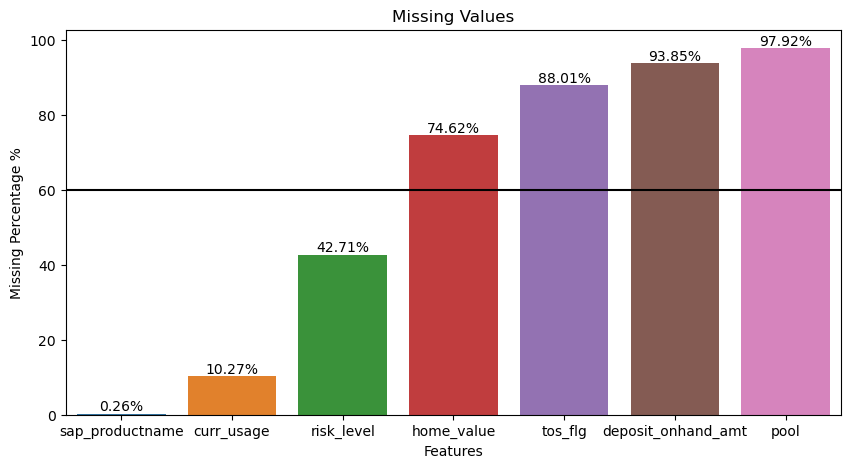

In [227]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.barplot(x=m1.Features,y=m1.MissingPct)
ax.axhline(y=60, color="black")
ax.bar_label(ax.containers[0], fmt='{:,.2f}%')

plt.title('Missing Values')
plt.ylabel('Missing Percentage %')
plt.show()

## Target Distribution

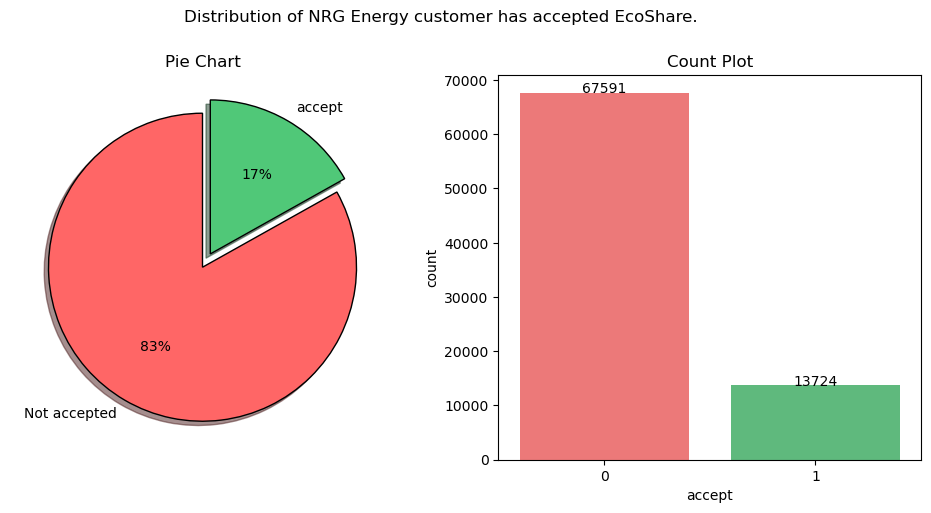

In [36]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
labels = ['Not accepted', 'accept']
colors = ['#ff6666', '#50C878']
explode = (0, 0.1)
ax[0].pie(df.accept.value_counts(), startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%',
        explode=explode, shadow=True,labels=labels,)
ax[0].set_title('Pie Chart')

sns.countplot(x=df.accept,ax=ax[1],palette=colors)
for idx, row in pd.DataFrame(df['accept'].value_counts().reset_index()).iterrows():
    ax[1].text(idx,row.accept, str(round(row.accept)),color='black', ha="center")
ax[1].set_title("Count Plot")
#plt.tight_layout()
plt.suptitle('Distribution of NRG Energy customer has accepted EcoShare.',verticalalignment='bottom')
plt.show()

## Customers

In [37]:
print('# of uniq customers : {}'.format(df.customer_id.nunique()))

# of uniq customers : 52481


In [38]:
d1=df[['customer_id','meter_id']].drop_duplicates()
d1=d1.reset_index(drop=True)
d1.head()

,customer_id,meter_id
0,55843,11745
1,17325,25319
2,20004,23202
3,55635,11475
4,49599,38365


In [39]:
d1.shape

(53198, 2)

In [40]:
df['cust_meter_id']=df.customer_id.astype(str) + '_' + df.meter_id.astype(str)

In [41]:
df['cust_meter_id'].value_counts()

33132_9129     20
11961_9129     12
17719_15464     6
21125_3812      6
7581_52682      6
               ..
47970_17158     1
13916_46227     1
21173_32202     1
18748_51528     1
43653_582       1
Name: cust_meter_id, Length: 53198, dtype: int64

In [47]:
df['customer_id'].value_counts()

33132    20
11961    12
51041     7
35728     6
46296     6
         ..
47034     1
23185     1
52446     1
16293     1
43653     1
Name: customer_id, Length: 52481, dtype: int64

In [44]:
df.loc[df.cust_meter_id=='17719_15464',:].reset_index(drop=True)

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id,cust_meter_id
0,2017-01-13,0,NaN,N,0,18,0,Y,S,1062.0,TERM,NaN,N,N,NaN,NaN,Y,N,Y,Reliant Secure 18 plan,0,N,R1,SAN ANGELO,769038650,NaN,TOM GREEN,WTU,SAN ANGELO,N,4,17719,15464,17719_15464
1,2017-09-05,0,NaN,N,0,18,0,N,S,1323.0,TERM,NaN,N,N,NaN,NaN,Y,N,Y,Reliant Secure 18 plan,0,N,R1,SAN ANGELO,769038650,NaN,TOM GREEN,WTU,SAN ANGELO,N,4,17719,15464,17719_15464
2,2018-12-12,0,NaN,N,0,0,0,N,S,799.0,MTM,NaN,N,N,L,NaN,Y,N,Y,Reliant Flex plan,0,N,R1,SAN ANGELO,769038650,NaN,TOM GREEN,WTU,SAN ANGELO,N,4,17719,15464,17719_15464
3,2018-12-21,0,NaN,N,0,0,0,N,S,799.0,MTM,NaN,N,N,L,NaN,Y,N,Y,Reliant Flex plan,0,N,R1,SAN ANGELO,769038650,NaN,TOM GREEN,WTU,SAN ANGELO,N,4,17719,15464,17719_15464
4,2019-01-05,0,NaN,N,0,0,0,N,S,740.0,MTM,NaN,Y,Y,L,NaN,Y,N,Y,Reliant Flex plan,1,N,R1,SAN ANGELO,769038650,NaN,TOM GREEN,WTU,SAN ANGELO,N,4,17719,15464,17719_15464
5,2020-11-17,0,NaN,N,0,0,0,N,S,800.0,MTM,NaN,Y,N,H,NaN,N,N,Y,Reliant Flex plan,0,N,R1,SAN ANGELO,769038650,NaN,TOM GREEN,WTU,SAN ANGELO,N,4,17719,15464,17719_15464


In [122]:
df.loc[df.customer_id==28789,:].reset_index(drop=True)

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id,cust_meter_id,Year,Month
0,2017-09-11,1,N,N,0,36,0,N,M,517.0,TERM,NaN,N,N,NaN,NaN,N,N,N,Reliant Secure 36 for Business,0,N,R2,GALVESTON,775505748,NaN,GALVESTON,CNP,HOUSTON,N,11,28789,1958,28789_1958,2017,9
1,2017-09-12,0,N,N,0,36,0,N,M,517.0,TERM,NaN,N,N,NaN,NaN,N,N,N,Reliant Secure 36 for Business,0,N,R2,GALVESTON,775505748,NaN,GALVESTON,CNP,HOUSTON,N,11,28789,1958,28789_1958,2017,9


In [55]:
df.groupby(['customer_id'])['meter_id'].nunique().sort_values(ascending=False)

customer_id
1190     5
9884     4
11750    3
15698    3
16750    3
        ..
20521    1
20522    1
20523    1
20524    1
61096    1
Name: meter_id, Length: 52481, dtype: int64

In [56]:
df.loc[df.customer_id==1190,:].reset_index(drop=True)

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id,cust_meter_id
0,2017-12-07,0,NaN,N,0,0,0,N,M,0.0,MTM,NaN,N,N,NaN,NaN,N,N,N,Reliant Flex plan,0,N,R1,HOUSTON,770364410,NaN,HARRIS,CNP,HOUSTON,N,3,1190,19858,1190_19858
1,2017-12-07,0,Y,N,0,0,0,N,S,12.0,MTM,NaN,N,N,NaN,NaN,N,N,N,Reliant Flex plan,0,N,R1,HOUSTON,770724901,NaN,HARRIS,CNP,HOUSTON,N,3,1190,15861,1190_15861
2,2017-12-07,1,NaN,N,0,0,0,N,M,26.0,MTM,NaN,N,N,NaN,NaN,N,N,N,Reliant Flex plan,0,N,R1,HOUSTON,770724426,NaN,HARRIS,CNP,HOUSTON,N,3,1190,43032,1190_43032
3,2017-12-07,1,NaN,N,0,0,0,N,M,NaN,MTM,NaN,N,N,NaN,NaN,N,N,N,Reliant Flex plan,0,N,R1,HOUSTON,770043408,NaN,HARRIS,CNP,HOUSTON,N,5,1190,4441,1190_4441
4,2017-12-07,0,NaN,N,0,0,0,N,M,34.0,MTM,NaN,N,N,NaN,NaN,N,N,N,Reliant Flex plan,0,N,R1,HOUSTON,770724900,NaN,HARRIS,CNP,HOUSTON,N,3,1190,3162,1190_3162


## Univariate Analysis

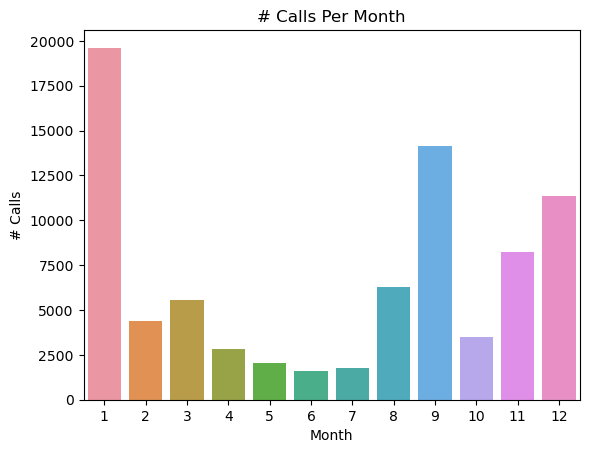

In [66]:
sns.barplot(x=df.order_day.dt.month.value_counts().index,y=df.order_day.dt.month.value_counts().values)
plt.xlabel('Month')
plt.ylabel('# Calls')
plt.title('# Calls Per Month')
plt.show()

In [79]:
df['Year']=df.order_day.dt.year
df['Month']=df.order_day.dt.month

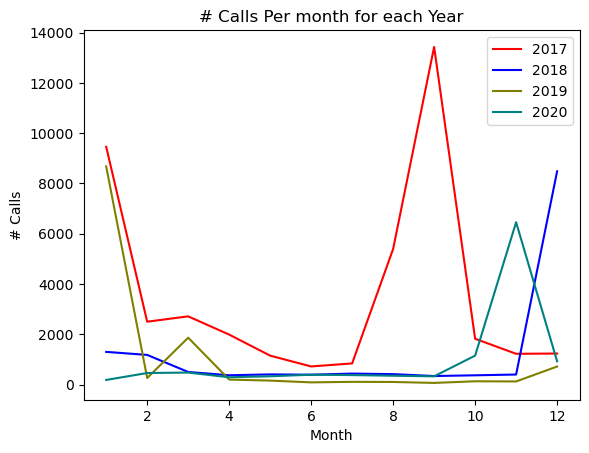

In [92]:
sns.lineplot(x=df.loc[df.Year==2017,'Month'].value_counts().index,\
             y=df.loc[df.Year==2017,'Month'].value_counts().values,color='r',label='2017')

sns.lineplot(x=df.loc[df.Year==2018,'Month'].value_counts().index,\
             y=df.loc[df.Year==2018,'Month'].value_counts().values,color='b',label='2018')

sns.lineplot(x=df.loc[df.Year==2019,'Month'].value_counts().index,\
             y=df.loc[df.Year==2019,'Month'].value_counts().values,color='olive',label='2019')

sns.lineplot(x=df.loc[df.Year==2020,'Month'].value_counts().index,\
             y=df.loc[df.Year==2020,'Month'].value_counts().values,color='teal',label='2020')

plt.title('# Calls Per month for each Year')
plt.xlabel('Month')
plt.ylabel('# Calls')
plt.show()

## TOs_Flg

In [94]:
df.tos_flg.value_counts()

Y    9746
Name: tos_flg, dtype: int64

In [95]:
df.loc[df.tos_flg.isnull(),'tos_flg']='N'

In [96]:
df.tos_flg.value_counts()

N    71569
Y     9746
Name: tos_flg, dtype: int64

In [101]:
pd.crosstab(df.accept,df.tos_flg,normalize=True)

tos_flg,N,Y
accept,,
0,0.735006,0.096218
1,0.145139,0.023636


In [102]:
df.columns

Index(['order_day', 'accept', 'tos_flg', 'disconotice_flg',
       'oam_activelogin_cnt', 'term_length', 'called_numcalls_cnt',
       'latefee_flg', 'dwelling_type_cd', 'curr_usage', 'product_type_cd',
       'pool', 'automatic_payment_flg', 'weblog_flg', 'risk_level',
       'deposit_onhand_amt', 'ebill_enroll_flag', 'called_flg', 'oam_flg',
       'sap_productname', 'numweblog_cnt', 'disconnects_flg', 'load_profile',
       'city', 'zipcode', 'home_value', 'county', 'tdsp', 'dma', 'ev_driver',
       'segment', 'customer_id', 'meter_id', 'cust_meter_id', 'Year', 'Month'],
      dtype='object')

## disconotice_flg

In [104]:
df.disconotice_flg.value_counts()

N    77813
Y     3502
Name: disconotice_flg, dtype: int64

In [106]:
pd.crosstab(df.disconotice_flg,df.accept,normalize=True)

accept,0,1
disconotice_flg,,
N,0.797504,0.159429
Y,0.033721,0.009346


In [107]:
pd.crosstab(df.disconotice_flg,df.accept)

accept,0,1
disconotice_flg,,
N,64849,12964
Y,2742,760


## oam_activelogin_cnt

In [118]:
df.loc[df.oam_activelogin_cnt>0,'accept'].value_counts()

0    537
1    495
Name: accept, dtype: int64

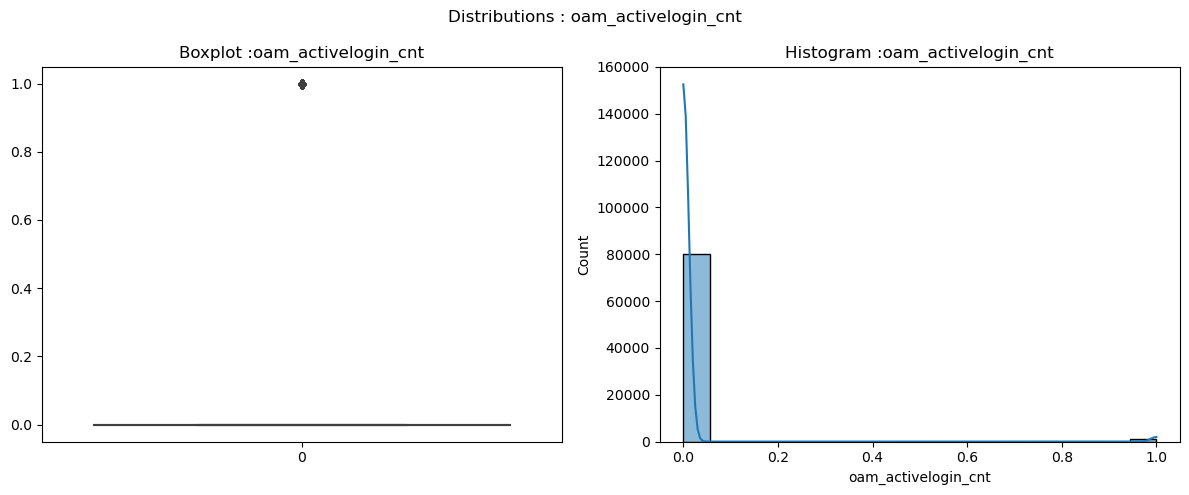

In [116]:
gen_num_plot('oam_activelogin_cnt')

## term_length

In [126]:
df.loc[df.term_length=='C&','term_length']=0
df.loc[df.term_length=='MM','term_length']=0

In [129]:
df.term_length=df.term_length.astype(np.int64)

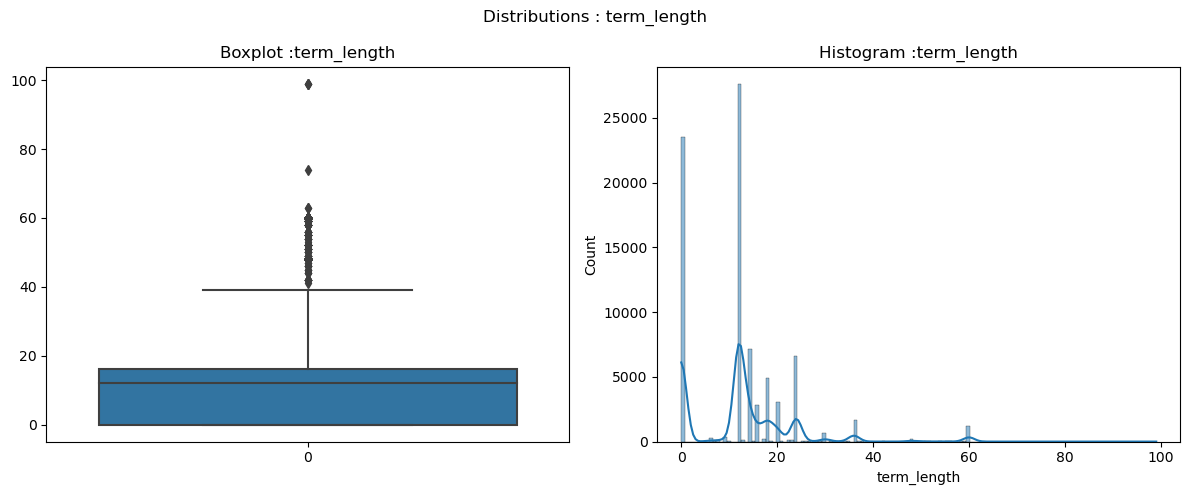

In [130]:
gen_num_plot('term_length')

## called_numcalls_cnt



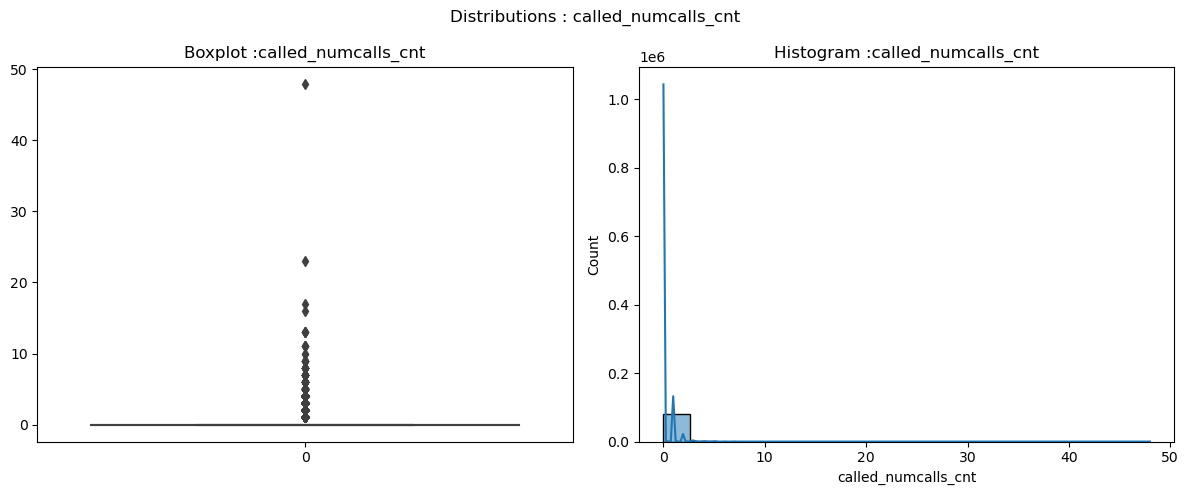

In [132]:
gen_num_plot('called_numcalls_cnt')

## latefee_flg



In [138]:
df.latefee_flg.value_counts()

N    73539
Y     7776
Name: latefee_flg, dtype: int64

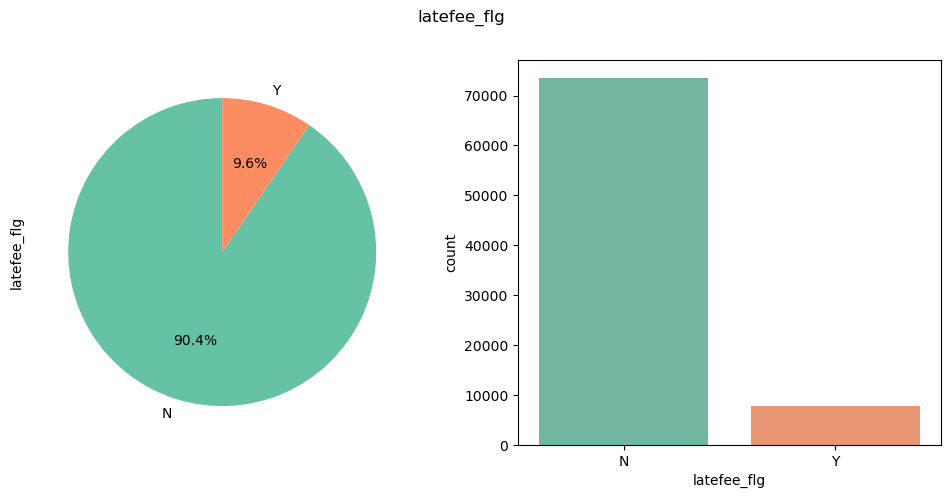

In [141]:
gen_ctgy_plot('latefee_flg')

In [143]:
pd.crosstab(df.latefee_flg,df.accept,normalize=True)

accept,0,1
latefee_flg,,
N,0.746578,0.157794
Y,0.084646,0.010982


## dwelling_type_cd

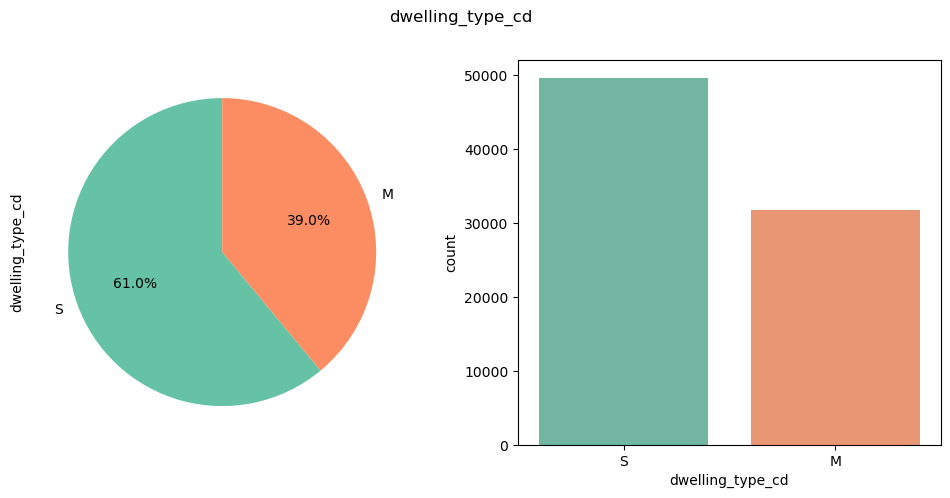

In [146]:
gen_ctgy_plot('dwelling_type_cd')

In [147]:
pd.crosstab(df.dwelling_type_cd,df.accept,normalize=True)

accept,0,1
dwelling_type_cd,,
M,0.308418,0.081338
S,0.522806,0.087438


## curr_usage

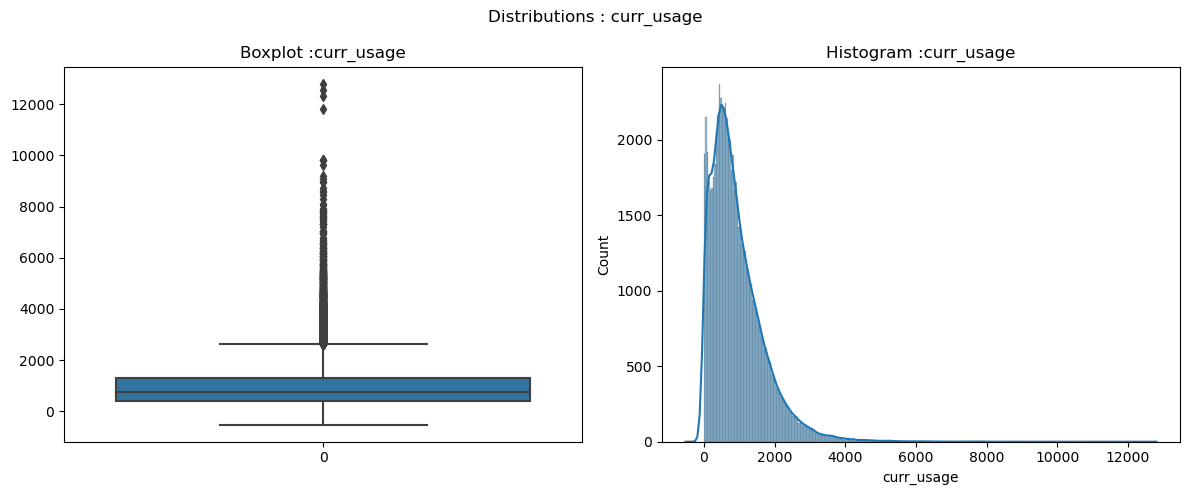

In [148]:
gen_num_plot('curr_usage')

In [207]:
df.loc[df.curr_usage==0,:].head()

,order_day,accept,tos_flg,disconotice_flg,oam_activelogin_cnt,term_length,called_numcalls_cnt,latefee_flg,dwelling_type_cd,curr_usage,product_type_cd,pool,automatic_payment_flg,weblog_flg,risk_level,deposit_onhand_amt,ebill_enroll_flag,called_flg,oam_flg,sap_productname,numweblog_cnt,disconnects_flg,load_profile,city,zipcode,home_value,county,tdsp,dma,ev_driver,segment,customer_id,meter_id,cust_meter_id,Year,Month
97,2017-01-03,0,N,N,0,0,2,N,S,0.0,MTM,NaN,N,N,Missing,NaN,N,Y,N,Reliant Flex plan,0,N,R1,ROYSE CITY,75189,295830.0,ROCKWALL,ONC,DALLAS-FT. WORTH,N,4,289,57565,289_57565,2017,1
199,2017-01-03,0,Y,N,0,0,0,N,M,0.0,MTM,NaN,N,N,L,NaN,Y,N,Y,Reliant Flex plan,0,N,R2,WESLACO,785964659,NaN,HIDALGO,CPL,HARLINGEN-WSLCO-BRNSVL-MCA,N,1,19587,54524,19587_54524,2017,1
313,2017-01-04,1,N,N,0,12,1,N,M,0.0,TERM,NaN,N,N,L,NaN,N,Y,N,Reliant First Month Free plan,0,N,R1,SANTA FE,775173240,NaN,GALVESTON,CNP,HOUSTON,N,10,1170,45214,1170_45214,2017,1
658,2017-01-06,0,N,N,0,36,0,N,M,0.0,TERM,NaN,N,N,L,NaN,N,N,N,Reliant Easy Look 36 plan,0,N,R2,EULESS,760403528,NaN,TARRANT,ONC,DALLAS-FT. WORTH,N,6,31276,42485,31276_42485,2017,1
740,2017-01-07,1,N,N,0,60,2,N,S,0.0,TERM,NaN,N,N,Missing,NaN,N,Y,N,Reliant Secure 60 LD plan,0,N,R2,MISSION,785746668,NaN,HIDALGO,CPL,HARLINGEN-WSLCO-BRNSVL-MCA,N,10,6156,36841,6156_36841,2017,1


## product_type_cd

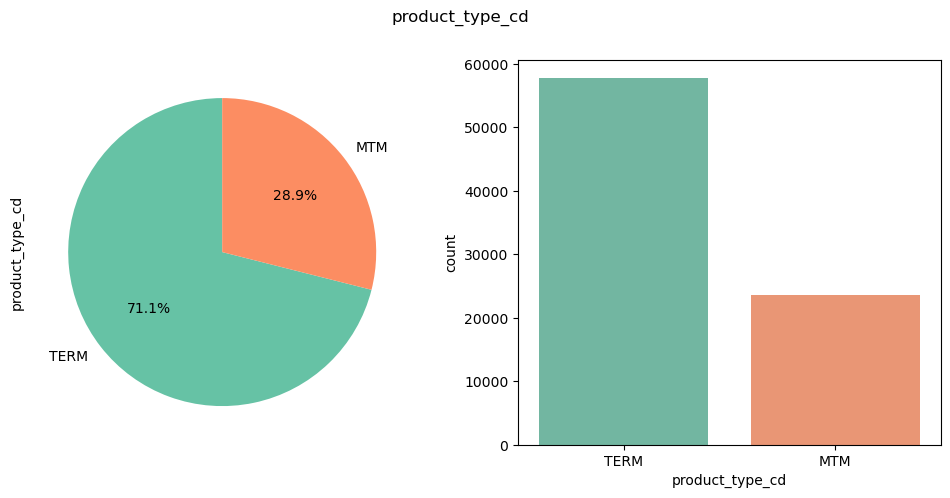

In [151]:
gen_ctgy_plot('product_type_cd')

In [152]:
pd.crosstab(df.product_type_cd,df.accept,normalize=True)

accept,0,1
product_type_cd,,
MTM,0.254135,0.035233
TERM,0.577089,0.133542


## pool

In [155]:
df.pool.value_counts()

Y    1600
N      89
Name: pool, dtype: int64

## automatic_payment_flg

In [157]:
df.automatic_payment_flg.value_counts()

N    64336
Y    16979
Name: automatic_payment_flg, dtype: int64

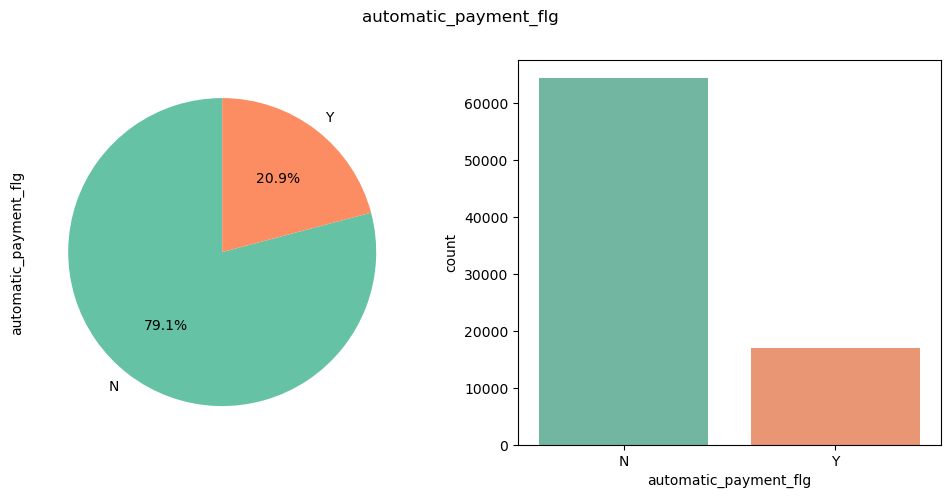

In [158]:
gen_ctgy_plot('automatic_payment_flg')

In [159]:
pd.crosstab(df.automatic_payment_flg,df.accept,normalize=True)

accept,0,1
automatic_payment_flg,,
N,0.638947,0.152247
Y,0.192277,0.016528


## weblog_flg

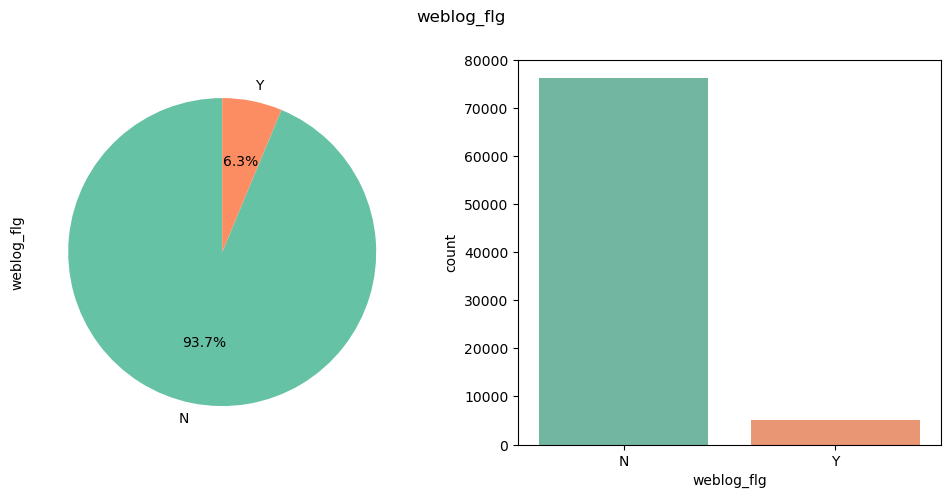

In [161]:
gen_ctgy_plot('weblog_flg')

In [162]:
pd.crosstab(df.weblog_flg,df.accept,normalize=True)

accept,0,1
weblog_flg,,
N,0.770436,0.166759
Y,0.060788,0.002017


## risk_level

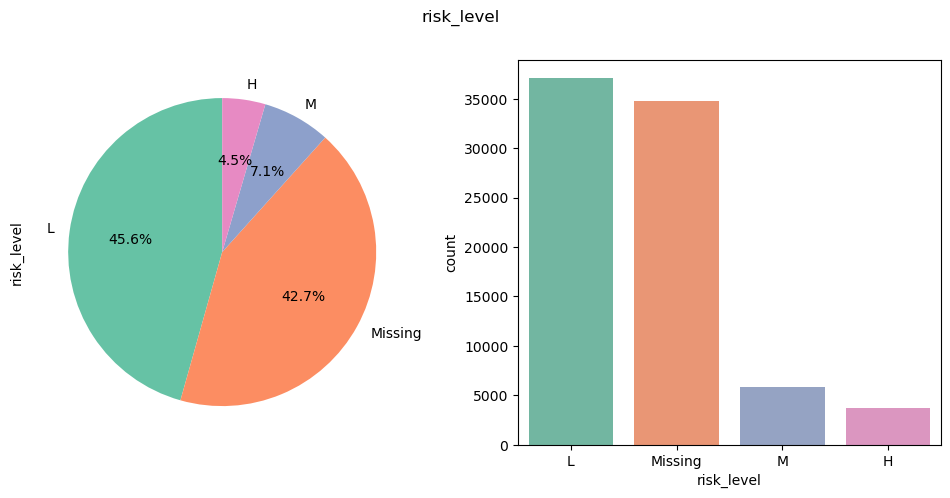

In [163]:
gen_ctgy_plot('risk_level')

In [164]:
pd.crosstab(df.risk_level,df.accept,normalize=True)

accept,0,1
risk_level,,
H,0.034692,0.010527
L,0.432761,0.023513
M,0.052733,0.018631
Missing,0.311037,0.116104


## deposit_onhand_amt

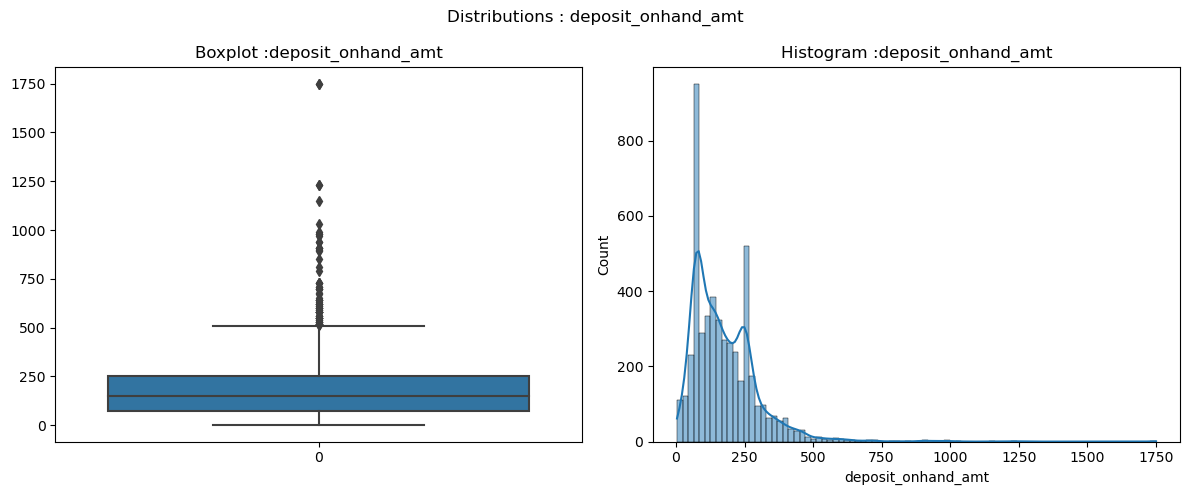

In [165]:
gen_num_plot('deposit_onhand_amt')

## ebill_enroll_flag

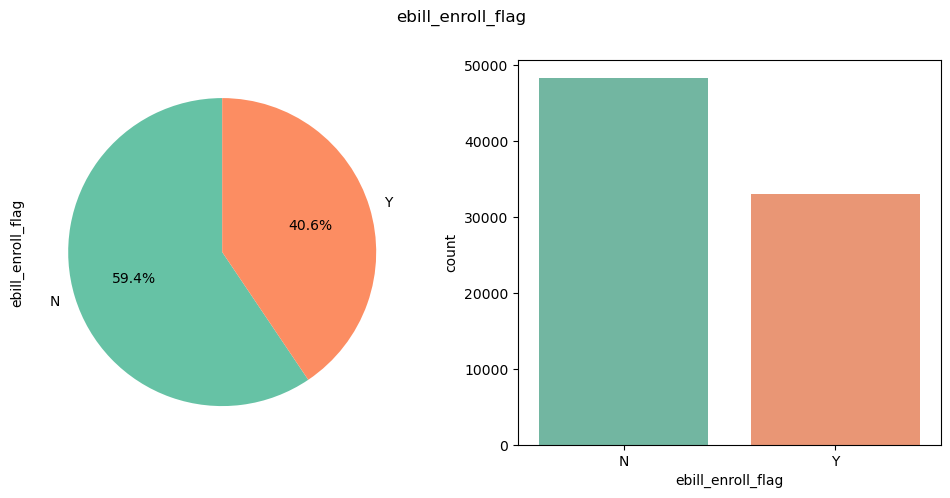

In [166]:
gen_ctgy_plot('ebill_enroll_flag')

In [168]:
pd.crosstab(df.risk_level,df.accept,normalize=True,margins=True, margins_name="Total")

accept,0,1,Total
risk_level,,,
H,0.034692,0.010527,0.045219
L,0.432761,0.023513,0.456275
M,0.052733,0.018631,0.071364
Missing,0.311037,0.116104,0.427141
Total,0.831224,0.168776,1.000000


## called_flg

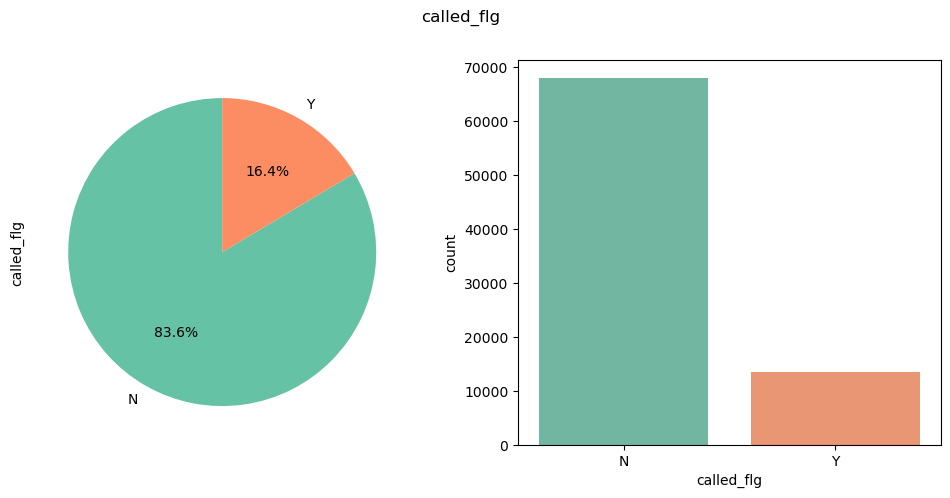

In [169]:
gen_ctgy_plot('called_flg')

In [170]:
pd.crosstab(df.called_flg,df.accept,normalize=True,margins=True, margins_name="Total")

accept,0,1,Total
called_flg,,,
N,0.729902,0.105602,0.835504
Y,0.101322,0.063174,0.164496
Total,0.831224,0.168776,1.000000


In [171]:
df.columns

Index(['order_day', 'accept', 'tos_flg', 'disconotice_flg',
       'oam_activelogin_cnt', 'term_length', 'called_numcalls_cnt',
       'latefee_flg', 'dwelling_type_cd', 'curr_usage', 'product_type_cd',
       'pool', 'automatic_payment_flg', 'weblog_flg', 'risk_level',
       'deposit_onhand_amt', 'ebill_enroll_flag', 'called_flg', 'oam_flg',
       'sap_productname', 'numweblog_cnt', 'disconnects_flg', 'load_profile',
       'city', 'zipcode', 'home_value', 'county', 'tdsp', 'dma', 'ev_driver',
       'segment', 'customer_id', 'meter_id', 'cust_meter_id', 'Year', 'Month'],
      dtype='object')

## oam_flg

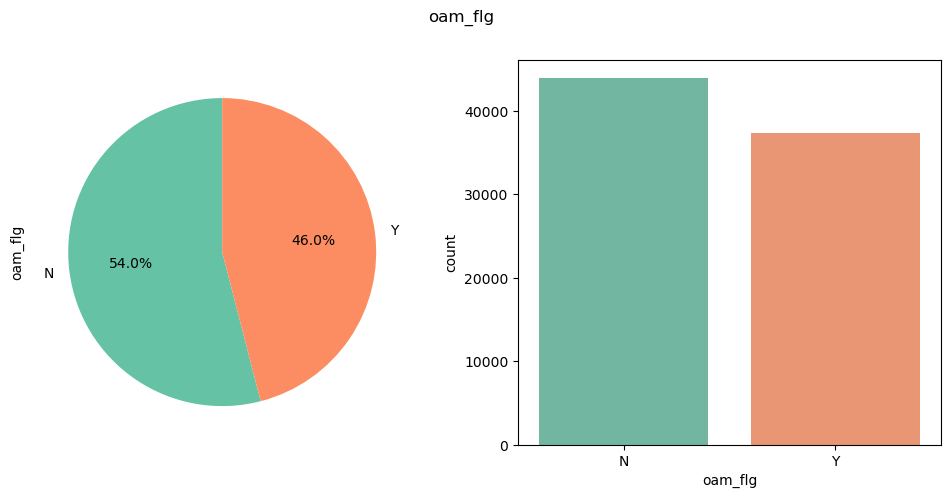

In [172]:
gen_ctgy_plot('oam_flg')

In [173]:
pd.crosstab(df.oam_flg,df.accept,normalize=True,margins=True, margins_name="Total")

accept,0,1,Total
oam_flg,,,
N,0.418078,0.122142,0.54022
Y,0.413146,0.046633,0.45978
Total,0.831224,0.168776,1.00000


## sap_productname

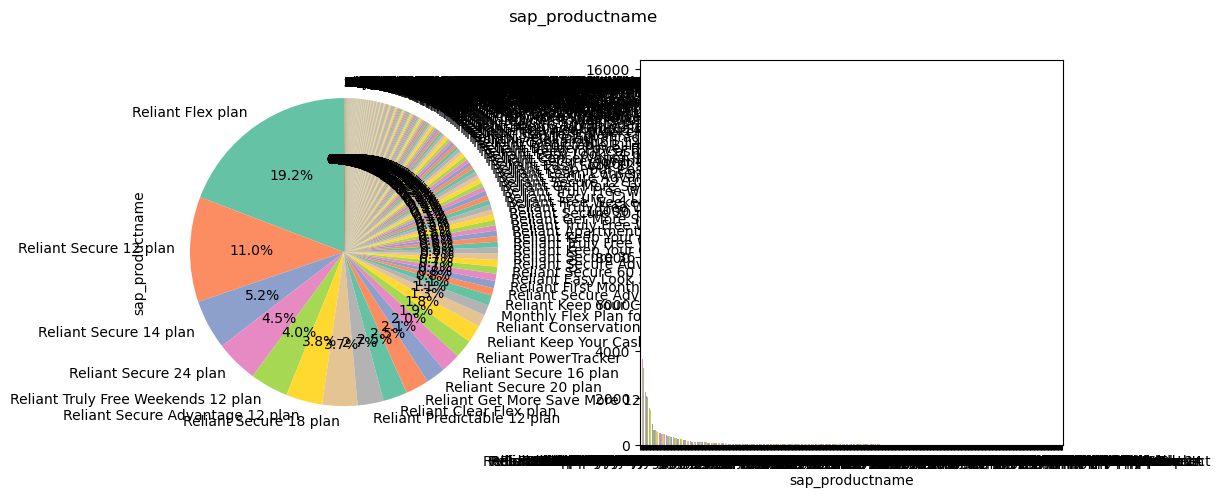

In [174]:
gen_ctgy_plot('sap_productname')

In [176]:
df.sap_productname.nunique()

545

In [178]:
df.sap_productname.value_counts().head(10)

Reliant Flex plan                      15607
Reliant Secure 12 plan                  8980
Reliant Secure 14 plan                  4231
Reliant Secure 24 plan                  3627
Reliant Truly Free Weekends 12 plan     3260
Reliant Secure Advantage 12 plan        3104
Reliant Secure 18 plan                  2996
Reliant Predictable 12 plan             2219
Reliant Clear Flex plan                 2060
Reliant Get More Save More 12 plan      2007
Name: sap_productname, dtype: int64

## numweblog_cnt

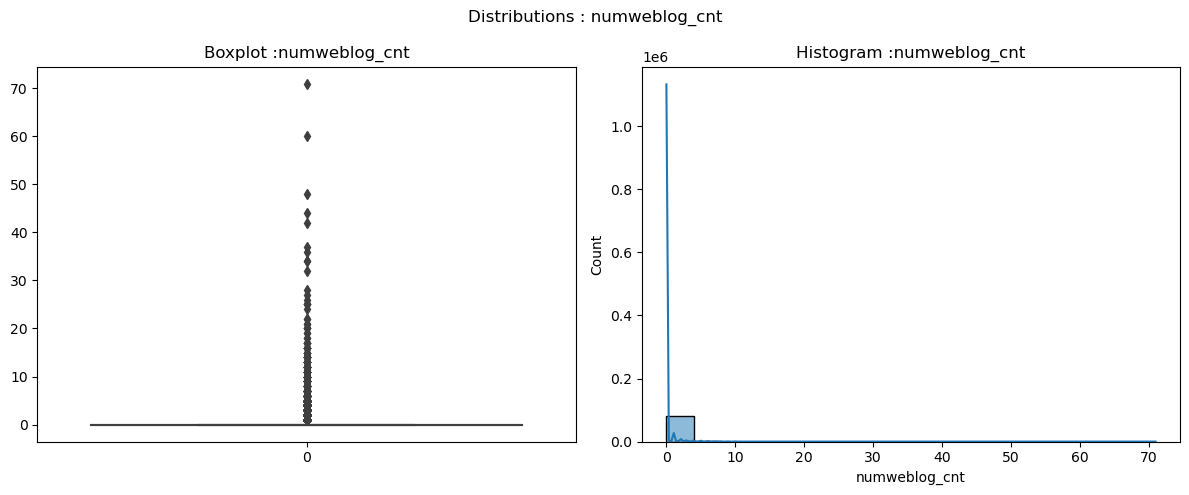

In [179]:
gen_num_plot('numweblog_cnt')

## disconnects_flg

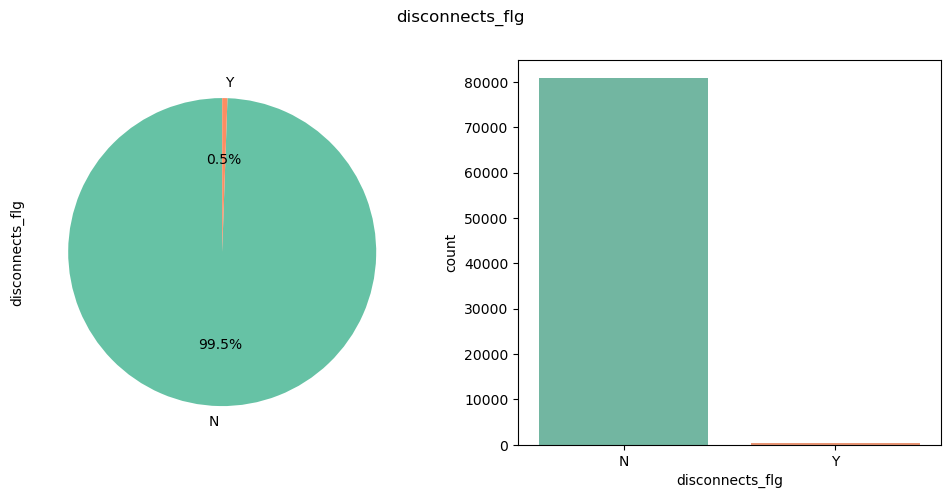

In [180]:
gen_ctgy_plot('disconnects_flg')

In [181]:
pd.crosstab(df.disconnects_flg,df.accept,normalize=True,margins=True, margins_name="Total")

accept,0,1,Total
disconnects_flg,,,
N,0.827461,0.167091,0.994552
Y,0.003763,0.001685,0.005448
Total,0.831224,0.168776,1.000000


## load_profile

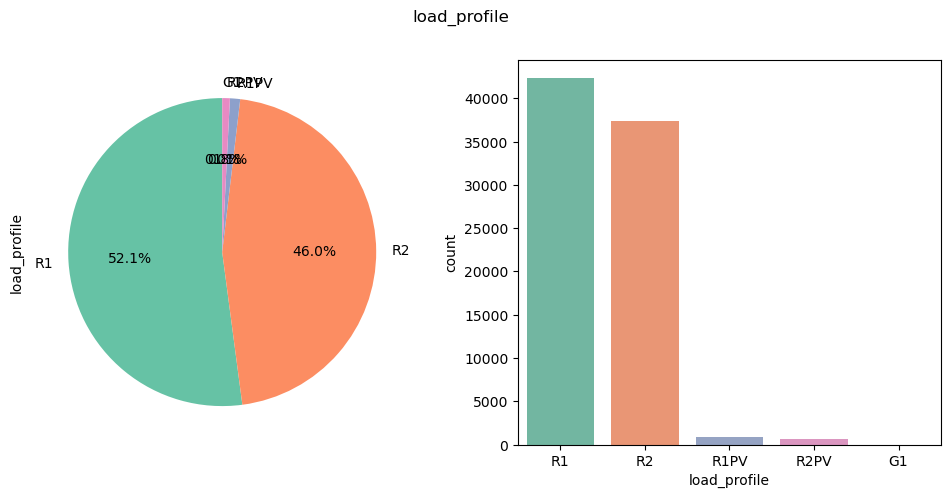

In [182]:
gen_ctgy_plot('load_profile')

In [183]:
pd.crosstab(df.load_profile,df.accept,normalize=True,margins=True, margins_name="Total")

accept,0,1,Total
load_profile,,,
G1,0.000037,0.000000,0.000037
R1,0.441456,0.079456,0.520913
R1PV,0.009691,0.001008,0.010699
R2,0.373264,0.087118,0.460382
R2PV,0.006776,0.001193,0.007969
Total,0.831224,0.168776,1.000000


## city

In [184]:
df.city.nunique()

620

In [185]:
df.city.value_counts()

HOUSTON        24589
DALLAS          5437
FORT WORTH      3363
KATY            1664
SPRING          1629
               ...  
LAMAR              1
BUFFALO GAP        1
PALMHURST          1
STRAWN             1
BARTLETT           1
Name: city, Length: 620, dtype: int64

In [208]:
df['city'].value_counts().nlargest(3)

HOUSTON       24589
DALLAS         5437
FORT WORTH     3363
Name: city, dtype: int64

## zipcode

In [186]:
df.zipcode.value_counts()

77449        292
77494        197
77469        191
77386        181
77433        177
            ... 
770912705      1
770253009      1
750887652      1
752274135      1
752112925      1
Name: zipcode, Length: 38277, dtype: int64

## home_value

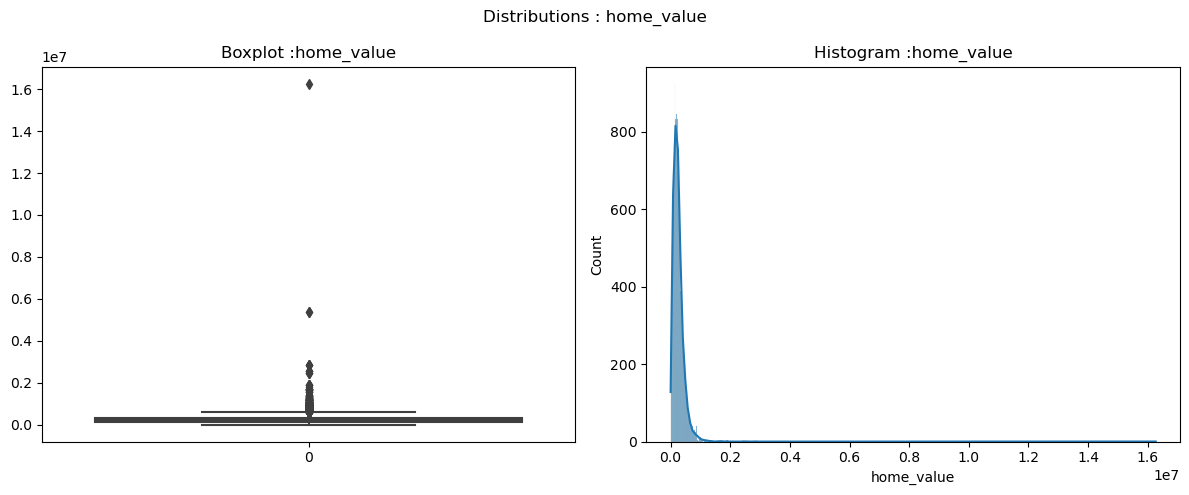

In [188]:
gen_num_plot('home_value')

## county

In [190]:
df.county.nunique()

150

In [191]:
df.county.value_counts()

HARRIS        32966
DALLAS         9256
TARRANT        7270
FORT BEND      3759
COLLIN         2244
              ...  
KENT              1
HALL              1
MCCULLOCH         1
WOOD              1
JEFF DAVIS        1
Name: county, Length: 150, dtype: int64

## tdsp

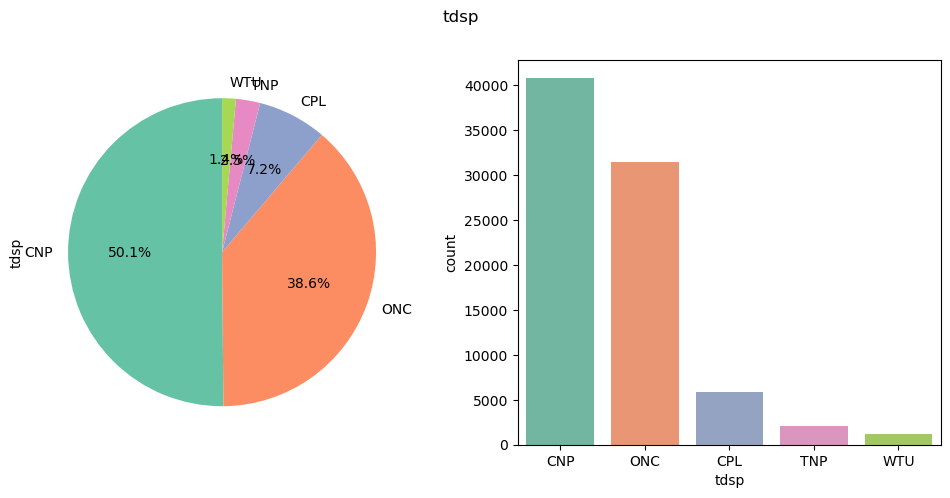

In [194]:
gen_ctgy_plot('tdsp')

In [195]:
pd.crosstab(df.tdsp,df.accept,normalize=True,margins=True, margins_name="Total")

accept,0,1,Total
tdsp,,,
CNP,0.426871,0.074513,0.501384
CPL,0.054861,0.017512,0.072373
ONC,0.316977,0.069434,0.386411
TNP,0.020869,0.004550,0.025420
WTU,0.011646,0.002767,0.014413
Total,0.831224,0.168776,1.000000


In [196]:
df.columns

Index(['order_day', 'accept', 'tos_flg', 'disconotice_flg',
       'oam_activelogin_cnt', 'term_length', 'called_numcalls_cnt',
       'latefee_flg', 'dwelling_type_cd', 'curr_usage', 'product_type_cd',
       'pool', 'automatic_payment_flg', 'weblog_flg', 'risk_level',
       'deposit_onhand_amt', 'ebill_enroll_flag', 'called_flg', 'oam_flg',
       'sap_productname', 'numweblog_cnt', 'disconnects_flg', 'load_profile',
       'city', 'zipcode', 'home_value', 'county', 'tdsp', 'dma', 'ev_driver',
       'segment', 'customer_id', 'meter_id', 'cust_meter_id', 'Year', 'Month'],
      dtype='object')

## dma

In [198]:
df.dma.nunique()

18

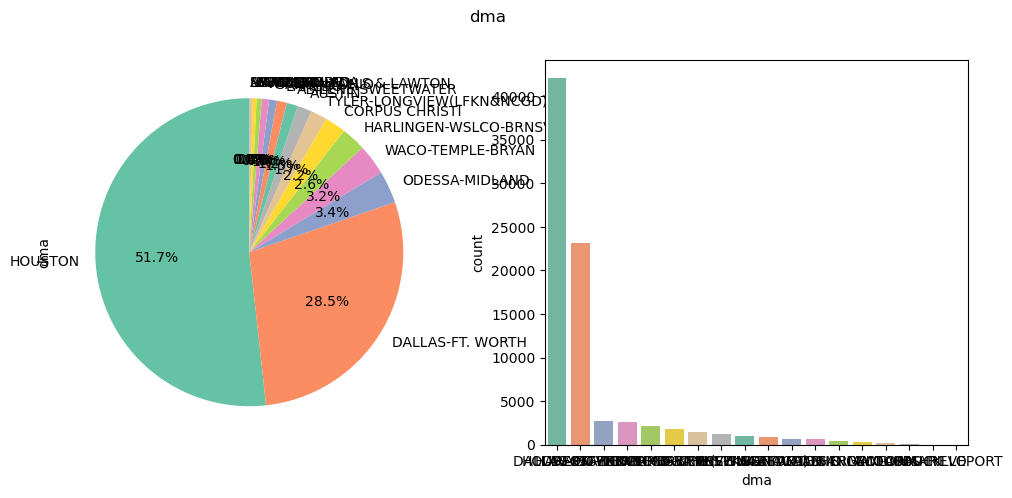

In [199]:
gen_ctgy_plot('dma')

In [200]:
df.dma.value_counts()

HOUSTON                       42076
DALLAS-FT. WORTH              23198
ODESSA-MIDLAND                 2762
WACO-TEMPLE-BRYAN              2595
HARLINGEN-WSLCO-BRNSVL-MCA     2108
CORPUS CHRISTI                 1798
TYLER-LONGVIEW(LFKN&NCGD)      1418
AUSTIN                         1215
ABILENE-SWEETWATER              956
LAREDO                          841
SAN ANTONIO                     668
WICHITA FALLS & LAWTON          623
SAN ANGELO                      439
SHERMAN-ADA                     327
VICTORIA                        228
LUBBOCK                          47
AMARILLO                         11
SHREVEPORT                        5
Name: dma, dtype: int64

In [201]:
pd.crosstab(df.dma,df.accept,normalize=True,margins=True, margins_name="Total")

accept,0,1,Total
dma,,,
ABILENE-SWEETWATER,0.009322,0.002435,0.011757
AMARILLO,0.000111,0.000025,0.000135
AUSTIN,0.012950,0.001992,0.014942
CORPUS CHRISTI,0.016799,0.005313,0.022112
DALLAS-FT. WORTH,0.237508,0.047777,0.285286
HARLINGEN-WSLCO-BRNSVL-MCA,0.019418,0.006506,0.025924
HOUSTON,0.440140,0.077304,0.517445
LAREDO,0.007785,0.002558,0.010342
LUBBOCK,0.000320,0.000258,0.000578


## ev_driver

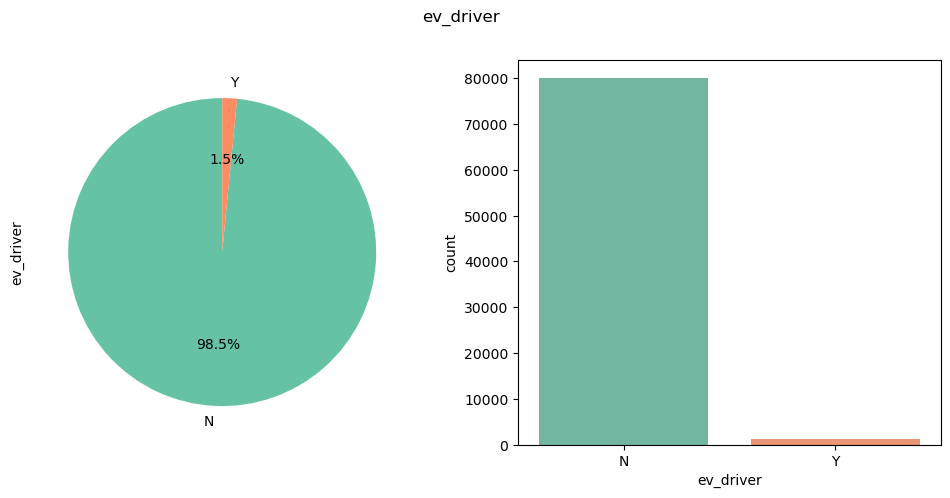

In [203]:
gen_ctgy_plot('ev_driver')

In [204]:
pd.crosstab(df.ev_driver,df.accept,normalize=True,margins=True, margins_name="Total")

accept,0,1,Total
ev_driver,,,
N,0.816737,0.167817,0.984554
Y,0.014487,0.000959,0.015446
Total,0.831224,0.168776,1.000000


## segment

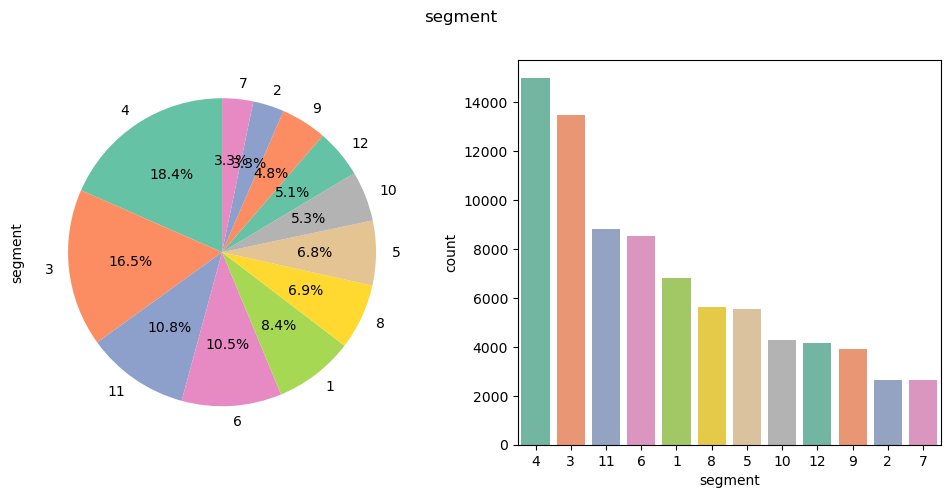

In [205]:
gen_ctgy_plot('segment')

In [206]:
df.columns

Index(['order_day', 'accept', 'tos_flg', 'disconotice_flg',
       'oam_activelogin_cnt', 'term_length', 'called_numcalls_cnt',
       'latefee_flg', 'dwelling_type_cd', 'curr_usage', 'product_type_cd',
       'pool', 'automatic_payment_flg', 'weblog_flg', 'risk_level',
       'deposit_onhand_amt', 'ebill_enroll_flag', 'called_flg', 'oam_flg',
       'sap_productname', 'numweblog_cnt', 'disconnects_flg', 'load_profile',
       'city', 'zipcode', 'home_value', 'county', 'tdsp', 'dma', 'ev_driver',
       'segment', 'customer_id', 'meter_id', 'cust_meter_id', 'Year', 'Month'],
      dtype='object')

In [210]:
df.groupby(['segment'])['accept'].sum()

segment
1      989
2      289
3     2731
4     2890
5     1123
6     1482
7      242
8      930
9      334
10    1054
11    1182
12     478
Name: accept, dtype: int64

In [211]:
pd.crosstab(df.segment,df.accept,normalize=True,margins=True, margins_name="Total")

accept,0,1,Total
segment,,,
1,0.071487,0.012163,0.083650
2,0.029134,0.003554,0.032688
3,0.131882,0.033585,0.165468
4,0.148583,0.035541,0.184123
5,0.054172,0.013810,0.067983
6,0.086700,0.018225,0.104925
7,0.029613,0.002976,0.032589
8,0.057480,0.011437,0.068917
9,0.044039,0.004107,0.048146
